# SPIN 1 - VL 02 


## Vortsetzung: Nullstellensuche

### Newtonsches Verfahren
Das Newton-Verfahren, auch Newton-Raphson-Verfahren, (benannt nach Sir Isaac Newton 1669 und Joseph Raphson 1690) ist in der Mathematik ein Standardverfahren zur numerischen Lösung von nichtlinearen Gleichungen und Gleichungssystemen. 

Formal ausgedrückt wird ausgehend von einem Startwert x_0 die Iteration

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

wiederholt, bis eine hinreichende Genauigkeit erzielt wird.

In [1]:
def derivative(f):
    def compute(x, dx):
        return (f(x+dx) - f(x))/dx
    return compute

def newtons_method(f, x, dx=0.000001, tolerance=0.000001):
    df = derivative(f)
    cnt = 0
    while True:
        cnt += 1
        x1 = x - f(x)/df(x, dx)
        t = abs(x1 - x)
        if t < tolerance:
            break
        x = x1
        
    return [x, cnt]


def f(x):
    return 3*x**5 - 2*x**3 + 1*x - 37


x_approx = 1  # rough guess
# f refers to the function f(x)
x, cnt = newtons_method(f, x_approx)
print("Solve for x in 3*x**5 - 2*x**3 + 1*x - 37 = 0")
print("x = %0.12f" % x)
print("Number of Iterations = %d" % cnt)

Solve for x in 3*x**5 - 2*x**3 + 1*x - 37 = 0
x = 1.722575335786
Number of Iterations = 10


Das Newton-Verfahren hat eine lokale quadratische Konvergenz, ist aber nicht so stabil wie das Bisektionsverfahren.

In [2]:
#TODO Wurzeln?

## Kepler Gleichung

Die Kepler-Gleichung ist eine transzendente Gleichung zur Berechnung elliptischer Bahnen von Himmelskörpern. Sie ergibt sich aus den ersten beiden Kepler'schen Gesetzen, die Johannes Kepler 1609 publizierte, und lautet

$M = E - e \cdot \sin E$

$e$ ist die Eccentricität, $M$ ist die mittlere Anomalie und $E$ die exzentrische Anomalie, dabei ist $E_0 = M$. $E$ und $M$ werden Gebraucht um Punkte auf einem Keplerschen Orbit zu bestimmen.

$M = nt$ wobei $n = {2\pi}/T$ und $T=a^{3/2}$

Daraus lässt sich dann folgendes berechnen:

$f(E)=E-e\cdot \sin E - M$

$f'(E)=1-e\cdot \sin E $

Um die Punkte eines Keplerschen Orbits lassen sich mit folgenden Gleichungen Berechnen:

 \begin{array}{lcl}
x & =  & a (\cos E - e) \\
y & = &  a \sqrt{1-e^2} \sin E
\end{array}
 
 $a\sqrt{1-e^2}$ ist die kleinere Halbachse b.
 Um $E$ in Abhängigkeit von $t$ zu bekommen $E(t)$, kann man die Nullstellen der Kepplergleichung mit Hilfe der Newton-Methode berechnen.
 

283


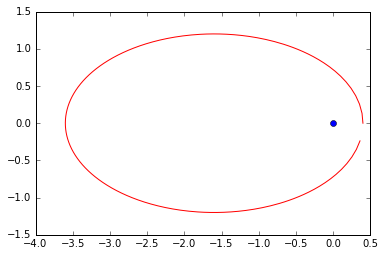

In [6]:
%matplotlib inline
import math
import numpy as np
from pylab import *
dt = 0.01
e = 0.8
a = 2
T = a**(3/2)
n = (2 * math.pi) / T
M = np.arange(0,T, dt) * n
print(len(M))
E = [M[0]]
def f(E,e,M):
    return E - e*np.sin(E) - M

def df(E,e):
    return 1 - e*np.cos(E)

def newtons_method(f, df, E, e, M, tolerance=0.0001):
    while True:
        x1 = E - f(E,e,M)/df(E,e)
        t = abs(x1 - E)
        if t < tolerance:
            break
        E = x1
    return E

def point(E,e):
    return [a * (np.cos(E) - e), a * sqrt(1 - e**2) * np.sin(E)]

for i in range(1,len(M)):
    e_new = newtons_method(f,df,E[i-1],e,M[i-1])
    E.append(e_new)

x,y = point(E,e)
figure()
plot(x,y,"r")
plot(0,0,"o")
show()